# Supervised Learning: Student's dropout and academic success


## Notebook by André Santos, Edgar Torre, João Afonso - G22 Theme 1D



### [Faculdade de Engenharia da Universidade do Porto](https://sigarra.up.pt/feup/pt/web_page.inicial)


# Introduction

The goal of this notebook is to show that Supervised Learning Models can learn to predict the dropout of a student and it's academic success. The problem is formulated as a three-category classification task, in which there is a strong imbalance towards one of the classes.

"A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters" - [Introduction of the problem and specifications of the data set used (Kaggle)](https://www.kaggle.com/datasets/tulasiram574/students-dropout-and-academic-success)

# Libraries


First we import everything we need in order to correctly use the algorithms:

In [116]:
import pandas as pd
import numpy as nm

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from collections import Counter

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
warnings.filterwarnings('ignore')


## Data Checking


There is 1 dataset available:
* data.csv: Contains a table where each row represents a student enrolled in different undergraduate degrees and each collumn represents information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The last collumn is target (Dropout, Graduate or Enrolled)


### data.csv 

In [7]:
# Load the dataset
dataset = pd.read_csv('C:/Users/ASUS/Desktop/FEUP/3ano/2Semestre/IART/PROJ-IART2/src/data.csv', delimiter=',')


In [9]:
# Check the dataset
dataset

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


Firstly we check the general information about the dataset used:

In [3]:
# General info of the dataset

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Then we check the general statistics of the dataset:

In [24]:
# General info about the dataset
dataset.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Now that we checked those we are going to check the **types** of each variable in order to see if we need to change them or not according to what would make sense in our problem.

In [6]:
# Checking the types of the collumns in the dataset
dataset.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

We also checked if there are any **null** or **missing** values present in each of the collumns presented in the dataset

In [23]:
# Checking the dataset for null or missing values
dataset.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Creating the correlation matrix in order to check if we need to eliminate any variables with a correlation higher than 0.95 since they will have low impact on the improving of the algorithm

In [15]:
# Creating correlation matrix
dataset_corr = dataset.corr().abs()
dataset_corr

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,0.125854,0.046365,0.274939,0.062529,0.022406,0.008843,0.193163,0.130353,...,0.034711,0.062831,0.039026,0.022784,0.043739,0.071506,0.020426,0.020338,0.008761,0.027003
Application mode,0.264006,1.000000,0.286357,0.065385,0.304092,0.422411,0.039020,0.000661,0.118974,0.083276,...,0.045828,0.238445,0.130046,0.167872,0.071526,0.115424,0.047983,0.089080,0.016375,0.022743
Application order,0.125854,0.286357,1.000000,0.059507,0.158657,0.184315,0.064484,0.022416,0.064956,0.050288,...,0.031699,0.125815,0.028878,0.055089,0.071793,0.055517,0.015757,0.098419,0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,0.043151,0.006654,0.081013,0.033923,0.054543,0.050724,...,0.034514,0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,0.020265
Daytime/evening attendance\t,0.274939,0.304092,0.158657,0.043151,1.000000,0.071871,0.052597,0.018530,0.204767,0.139894,...,0.045630,0.111953,0.000371,0.014610,0.034022,0.050493,0.004229,0.061974,0.024043,0.022929
Previous qualification,0.062529,0.422411,0.184315,0.006654,0.071871,1.000000,0.104072,0.029214,0.013190,0.006614,...,0.002887,0.143031,0.056179,0.114850,0.008632,0.000942,0.005102,0.111958,0.063736,0.064069
Previous qualification (grade),0.022406,0.039020,0.064484,0.081013,0.052597,0.104072,1.000000,0.054088,0.060670,0.035234,...,0.003926,0.018489,0.031649,0.061355,0.050263,0.053239,0.019015,0.045222,0.018710,0.052620
Nacionality,0.008843,0.000661,0.022416,0.033923,0.018530,0.029214,0.054088,1.000000,0.049946,0.085282,...,0.009145,0.007278,0.020113,0.025721,0.017880,0.008497,0.014041,0.000651,0.008922,0.034478
Mother's qualification,0.193163,0.118974,0.064956,0.054543,0.204767,0.013190,0.060670,0.049946,1.000000,0.535140,...,0.003183,0.042771,0.035150,0.021033,0.014858,0.031175,0.021305,0.114351,0.059441,0.083657
Father's qualification,0.130353,0.083276,0.050288,0.050724,0.139894,0.006614,0.035234,0.085282,0.535140,1.000000,...,0.017333,0.042666,0.024380,0.009514,0.005285,0.008083,0.007430,0.077905,0.057633,0.071610


# Plot of graphs

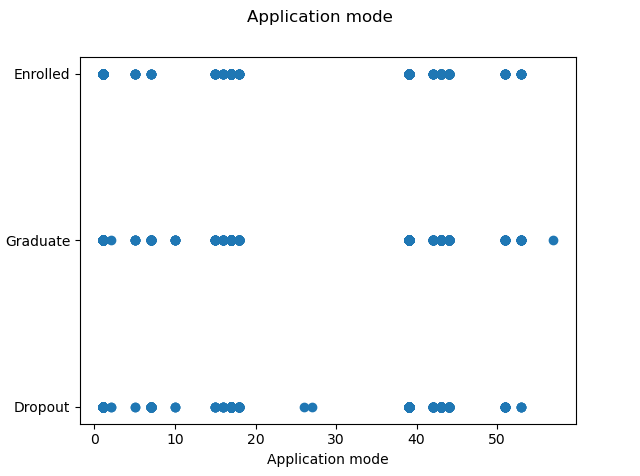

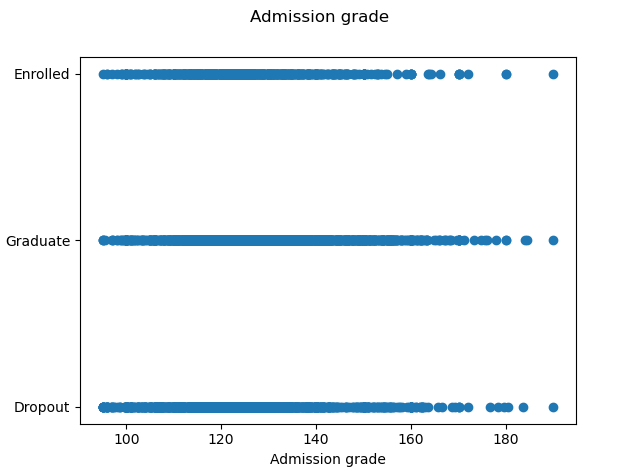

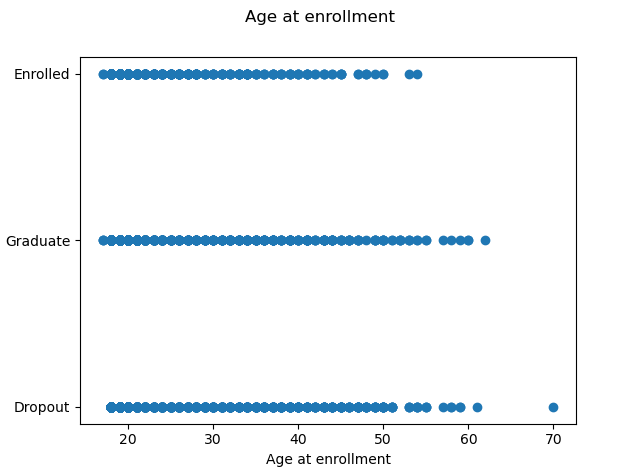

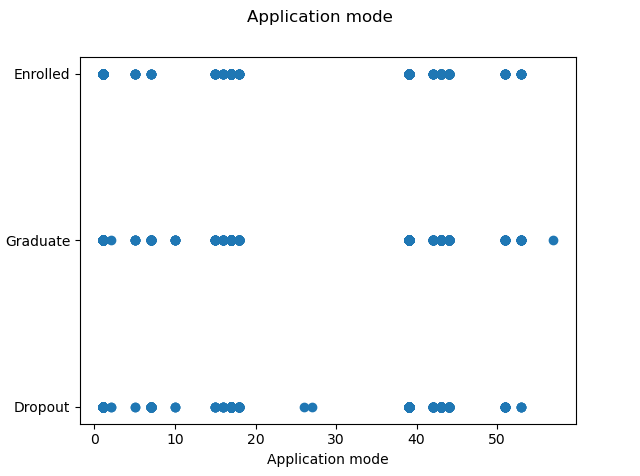

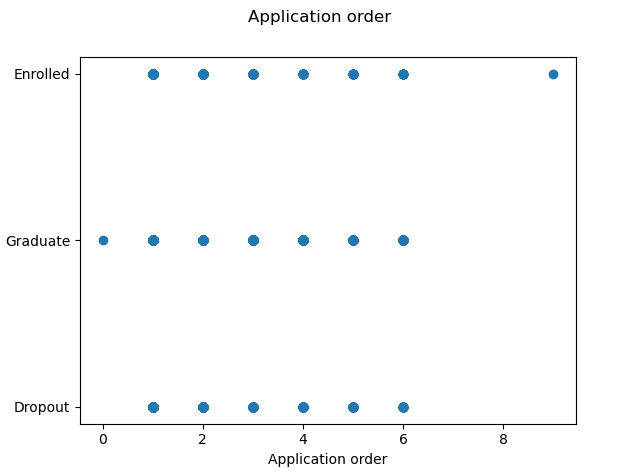

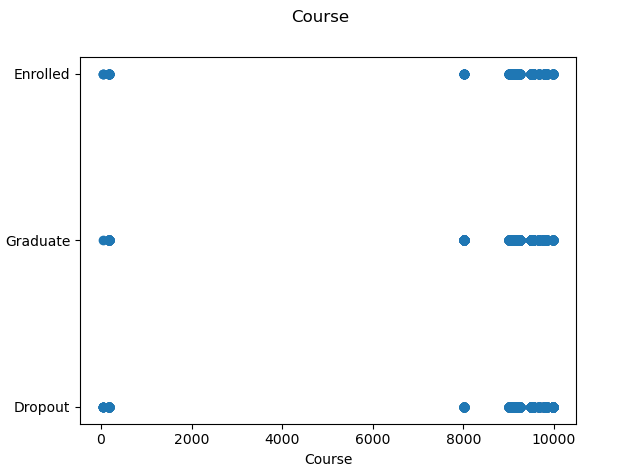

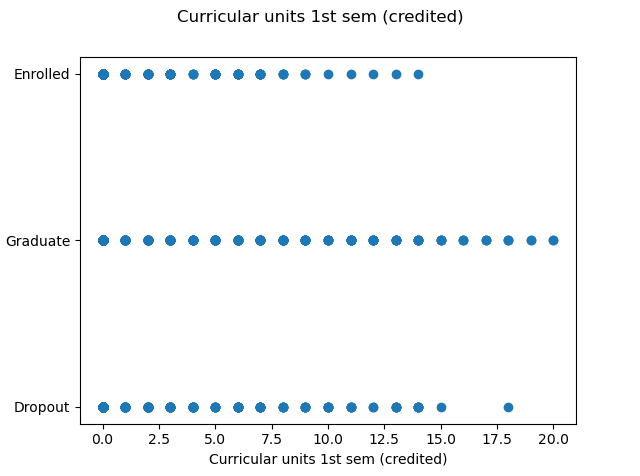

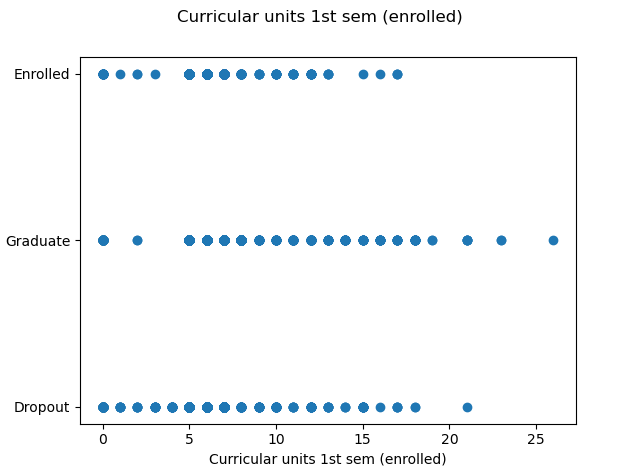

## Test and Train Split

Checking to see if any of the columns have a correlation higher than 0.95. In this dataset this doesn't happen so we won't need to drop any column.

In [22]:
# Choosing the upper triangle of the correlation matrix
upper_triangle = dataset_corr.where(nm.triu(nm.ones(dataset_corr.shape), k=1).astype(bool))

# Looking for columns with correlation higher than 0.95
collumn_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

Now that we checked the dataset for data that isn't useful we can now split the dataset into two different datasets. One that will be used for the training of the Machine Learning models and the other to test them.
We decided to split the dataset using 25% to test and the other 75% to train.

In [91]:
inputs = dataset.iloc[:, :-1].values
labels = dataset.iloc[:, -1].values

# Dividing the dataset into the train and test datasets
x_train, x_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.25, random_state=0)

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print(Counter(y_test))
print(Counter(y_train))

Counter({'Graduate': 560, 'Dropout': 353, 'Enrolled': 193})
Counter({'Graduate': 1649, 'Dropout': 1068, 'Enrolled': 601})


As we can see from the results of the split, our data set is umbalanced. Therefore we will try to either oversample or undersample it.

In [ ]:
# ovsp = SMOTE(random_state=1)
# unsp = RandomUnderSampler(random_state=1)

# oinputs, olabels = ovsp.fit_resample(inputs, labels)
# print(Counter(olabels))

# uinputs, ulabels = unsp.fitresample(inputs, labels)
# print(Counter(ulabels))

# scaler.fit(oinputs)
# oinputs = scaler.fit_transform(oinputs)

# scaler.fit(uinputs)
# uinputs = scaler.fit_transform(uinputs)


## Algorithms

Now that we are done with all the pre-processing and the preparation of the training and testing sets we applied 4 different algorithms (Decision Trees, KKN - K-Nearest Neighbor, SVM - Support Vector Machines and Multilayer Perceptron which is a Neural Network algorithm)

### Decision Trees

#### Original dataset

In [106]:
# In order to compare the algorithms later
classifiers = {}
grid_searches = {}
predictions = {}

# Decision Trees Algorithm

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

dt_parameter = {'criterion': ['gini','entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4, 'sqrt', 'auto','log2']}

dt_search = GridSearchCV(classifier,
                            param_grid=dt_parameter,
                            scoring='precision_weighted',
                            cv=10)

dt_search.fit(x_train, y_train)
print('Best score: {}'.format(dt_search.best_score_))
print('Best parameters: {}'.format(dt_search.best_params_))

dt_classifier = dt_search.best_estimator_

print(53 * '=')
print("\nTEST SET\n")
pred_test = dt_classifier.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test, pred_test)))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred_test))
print("\nClassification Report: \n")
print(classification_report(y_test, pred_test, target_names=['Dropout', 'Enrolled', 'Graduate']))

predictions['Decision Trees'] = pred_test
classifiers['Decision Trees-OG'] = dt_classifier
grid_searches['Decision Trees'] = dt_search


Best score: 0.6935454104543772
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'splitter': 'best'}

TEST SET

Accuracy Score: 0.7368896925858951

Confusion Matrix: 

[[258  46  49]
 [ 57  59  77]
 [ 31  31 498]]

Classification Report: 

              precision    recall  f1-score   support

    Graduate       0.75      0.73      0.74       353
     Dropout       0.43      0.31      0.36       193
    Enrolled       0.80      0.89      0.84       560

    accuracy                           0.74      1106
   macro avg       0.66      0.64      0.65      1106
weighted avg       0.72      0.74      0.72      1106



#### Oversampled dataset

In [ ]:
# Decision Trees Algorithm

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

dt_parameter = {'criterion': ['gini','entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4, 'sqrt', 'auto','log2']}

dt_search = GridSearchCV(classifier,
                            param_grid=dt_parameter,
                            scoring='precision_weighted',
                            cv=10)

dt_search.fit(oinputs, olabels)
print('Best score: {}'.format(dt_search.best_score_))
print('Best parameters: {}'.format(dt_search.best_params_))

dt_classifier = dt_search.best_estimator_

print(53 * '=')
print("\nTEST SET\n")
pred_test = dt_classifier.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test, pred_test)))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred_test))
print("\nClassification Report: \n")
print(classification_report(y_test, pred_test, target_names=['Dropout', 'Enrolled', 'Graduate']))

predictions['Decision Trees'] = pred_test
classifiers['Decision Trees-OV'] = dt_classifier
grid_searches['Decision Trees'] = dt_search

#### Undersampled dataset

In [ ]:
# Decision Trees Algorithm

classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

dt_parameter = {'criterion': ['gini','entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4, 'sqrt', 'auto','log2']}

dt_search = GridSearchCV(classifier,
                            param_grid=dt_parameter,
                            scoring='precision_weighted',
                            cv=10)

dt_search.fit(uinputs, ulabels)
print('Best score: {}'.format(dt_search.best_score_))
print('Best parameters: {}'.format(dt_search.best_params_))

dt_classifier = dt_search.best_estimator_

print(53 * '=')
print("\nTEST SET\n")
pred_test = dt_classifier.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test, pred_test)))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred_test))
print("\nClassification Report: \n")
print(classification_report(y_test, pred_test, target_names=['Dropout', 'Enrolled', 'Graduate']))

predictions['Decision Trees'] = pred_test
classifiers['Decision Trees-U'] = dt_classifier
grid_searches['Decision Trees'] = dt_search

### KKN - K-Nearest Neighbor

#### Original Set

In [107]:
kkn_classifier = KNeighborsClassifier()

kkn_parameters = {'n_neighbors': list(range(1,30)),
                    'weights': ['uniform','distance'],
                    'p':[1,2]}

kkn_search = GridSearchCV(kkn_classifier, 
                    kkn_parameters,
                    scoring='precision_weighted',
                    n_jobs=None,
                    cv=10)

kkn_search.fit(x_train, y_train)

print('Best score: {}'.format(kkn_search.best_score_))
print('Best parameters: {}'.format(kkn_search.best_params_))


kkn_classifier = kkn_search.best_estimator_

print(53 * '=')
print("\nTEST SET\n")
pred_test = kkn_classifier.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test, pred_test)))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred_test))
print("\nClassification Report: \n")
print(classification_report(y_test, pred_test, target_names=['Dropout', 'Enrolled', 'Graduate']))

predictions['K-Nearest Neighbor'] = pred_test
classifiers['K-Nearest Neighbor-OG'] = kkn_classifier
grid_searches['K-Nearest Neighbor'] = kkn_search


Best score: 0.7241851347097917
Best parameters: {'n_neighbors': 28, 'p': 1, 'weights': 'uniform'}

TEST SET

Accuracy Score: 0.7350813743218807

Confusion Matrix: 

[[227  28  98]
 [ 27  39 127]
 [  6   7 547]]

Classification Report: 

              precision    recall  f1-score   support

    Graduate       0.87      0.64      0.74       353
     Dropout       0.53      0.20      0.29       193
    Enrolled       0.71      0.98      0.82       560

    accuracy                           0.74      1106
   macro avg       0.70      0.61      0.62      1106
weighted avg       0.73      0.74      0.70      1106



#### Oversampled dataset

In [ ]:
kkn_classifier = KNeighborsClassifier()

kkn_parameters = {'n_neighbors': list(range(1,30)),
                    'weights': ['uniform','distance'],
                    'p':[1,2]}

kkn_search = GridSearchCV(kkn_classifier, 
                    kkn_parameters,
                    scoring='precision_weighted',
                    n_jobs=None,
                    cv=10)

kkn_search.fit(oinputs, olabels)

print('Best score: {}'.format(kkn_search.best_score_))
print('Best parameters: {}'.format(kkn_search.best_params_))


kkn_classifier = kkn_search.best_estimator_

print(53 * '=')
print("\nTEST SET\n")
pred_test = kkn_classifier.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test, pred_test)))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred_test))
print("\nClassification Report: \n")
print(classification_report(y_test, pred_test, target_names=['Dropout', 'Enrolled', 'Graduate']))

predictions['K-Nearest Neighbor'] = pred_test
classifiers['K-Nearest Neighbor-OV'] = kkn_classifier
grid_searches['K-Nearest Neighbor'] = kkn_search


#### Undersampled dataset

In [ ]:
kkn_classifier = KNeighborsClassifier()

kkn_parameters = {'n_neighbors': list(range(1,30)),
                    'weights': ['uniform','distance'],
                    'p':[1,2]}

kkn_search = GridSearchCV(kkn_classifier, 
                    kkn_parameters,
                    scoring='precision_weighted',
                    n_jobs=None,
                    cv=10)

kkn_search.fit(uinputs, ulabels)

print('Best score: {}'.format(kkn_search.best_score_))
print('Best parameters: {}'.format(kkn_search.best_params_))


kkn_classifier = kkn_search.best_estimator_

print(53 * '=')
print("\nTEST SET\n")
pred_test = kkn_classifier.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test, pred_test)))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred_test))
print("\nClassification Report: \n")
print(classification_report(y_test, pred_test, target_names=['Dropout', 'Enrolled', 'Graduate']))

predictions['K-Nearest Neighbor'] = pred_test
classifiers['K-Nearest Neighbor-U'] = kkn_classifier
grid_searches['K-Nearest Neighbor'] = kkn_search

### SVM - Support Vector Machines

#### Original Set

In [108]:
svm_classifier = SVC(random_state=0)


svm_parameters = [{'kernel': ['rbf', 'linear','poly','sigmoid'], 
                       'gamma': ['auto','scale', 1e-3, 1e-4], 
                       'C': [0.01, 0.1, 1, 10, 100],
                       'tol':[1e-4, 1e-3]}]


svm_search = GridSearchCV(svm_classifier,
                            param_grid=svm_parameters,
                            scoring='precision_weighted',
                            n_jobs=None,
                            cv=10)


svm_search.fit(x_train, y_train)
print('Best score: {}'.format(svm_search.best_score_))
print('Best parameters: {}'.format(svm_search.best_params_))

svm_classifier = svm_search.best_estimator_

print(53 * '=')
print("\nTEST SET\n")
pred_test = svm_classifier.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test, pred_test)))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred_test))
print("\nClassification Report: \n")
print(classification_report(y_test, pred_test, target_names=['Dropout', 'Enrolled', 'Graduate']))

predictions['Support Vector Machines'] = pred_test
classifiers['Support Vector Machines-OG'] = svm_classifier
grid_searches['Support Vector Machines'] = svm_search



Best score: 0.7543522231811824
Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf', 'tol': 0.0001}

TEST SET

Accuracy Score: 0.7839059674502713

Confusion Matrix: 

[[263  46  44]
 [ 38  77  78]
 [ 17  16 527]]

Classification Report: 

              precision    recall  f1-score   support

    Graduate       0.83      0.75      0.78       353
     Dropout       0.55      0.40      0.46       193
    Enrolled       0.81      0.94      0.87       560

    accuracy                           0.78      1106
   macro avg       0.73      0.70      0.71      1106
weighted avg       0.77      0.78      0.77      1106



#### Oversampled  Set

In [ ]:
svm_classifier = SVC(random_state=0)


svm_parameters = [{'kernel': ['rbf', 'linear','poly','sigmoid'], 
                       'gamma': ['auto','scale', 1e-3, 1e-4], 
                       'C': [0.01, 0.1, 1, 10, 100],
                       'tol':[1e-4, 1e-3]}]


svm_search = GridSearchCV(svm_classifier,
                            param_grid=svm_parameters,
                            scoring='precision_weighted',
                            n_jobs=None,
                            cv=10)


svm_search.fit(oinputs, olabels)
print('Best score: {}'.format(svm_search.best_score_))
print('Best parameters: {}'.format(svm_search.best_params_))

svm_classifier = svm_search.best_estimator_

print(53 * '=')
print("\nTEST SET\n")
pred_test = svm_classifier.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test, pred_test)))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred_test))
print("\nClassification Report: \n")
print(classification_report(y_test, pred_test, target_names=['Dropout', 'Enrolled', 'Graduate']))

predictions['Support Vector Machines'] = pred_test
classifiers['Support Vector Machines-OV'] = svm_classifier
grid_searches['Support Vector Machines'] = svm_search


#### Undersampled Set

In [ ]:
svm_classifier = SVC(random_state=0)


svm_parameters = [{'kernel': ['rbf', 'linear','poly','sigmoid'], 
                       'gamma': ['auto','scale', 1e-3, 1e-4], 
                       'C': [0.01, 0.1, 1, 10, 100],
                       'tol':[1e-4, 1e-3]}]


svm_search = GridSearchCV(svm_classifier,
                            param_grid=svm_parameters,
                            scoring='precision_weighted',
                            n_jobs=None,
                            cv=10)


svm_search.fit(uinputs, ulabels)
print('Best score: {}'.format(svm_search.best_score_))
print('Best parameters: {}'.format(svm_search.best_params_))

svm_classifier = svm_search.best_estimator_

print(53 * '=')
print("\nTEST SET\n")
pred_test = svm_classifier.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test, pred_test)))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred_test))
print("\nClassification Report: \n")
print(classification_report(y_test, pred_test, target_names=['Dropout', 'Enrolled', 'Graduate']))

predictions['Support Vector Machines'] = pred_test
classifiers['Support Vector Machines-U'] = svm_classifier
grid_searches['Support Vector Machines'] = svm_search


### Multilayer Perceptron


#### Original Set


In [ ]:
mp_classifier = MLPClassifier(random_state=1, early_stopping=False)


mp_parameters = {'hidden_layer_sizes': [(32,), (64,), (32, 64, 32)],
                     'activation': ['logistic','tanh', 'relu'],
                     'solver': ['adam', 'sgd', 'lbfgs'],
                     'alpha': [0.0001, 0.001, 0.01],
                     'learning_rate': ['constant','adaptive'],
                     'power_t': [0.25, 0.5, 0.75]}

mp_search = GridSearchCV(mp_classifier, 
                    mp_parameters,
                    scoring='precision_weighted',
                    n_jobs=None,
                    cv=10)


mp_search.fit(x_train, y_train)
print('Best score: {}'.format(mp_search.best_score_))
print('Best parameters: {}'.format(mp_search.best_params_))

mp_classifier = mp_search.best_estimator_

print(53 * '=')
print("\nTEST SET\n")
pred_test = mp_classifier.predict(x_test)
print("Accuracy Score: {}\n".format(accuracy_score(y_test, pred_test)))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred_test))
print("\nClassification Report: \n")
print(classification_report(y_test, pred_test, target_names=['Dropout', 'Enrolled', 'Graduate']))

predictions['Multilayer Perceptron'] = pred_test
classifiers['Multilayer Perceptron-OG'] = mp_classifier
grid_searches['Multilayer Perceptron'] = mp_search



## Evaluation

### Accuracy comparison of the algorithms

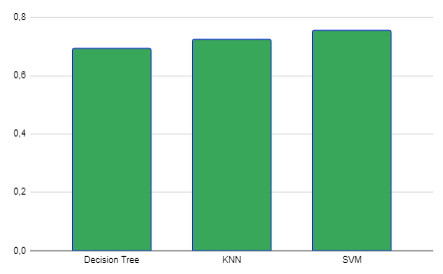

### Comparing classification reports

After analysing the classification reports we got from running the previous algorithms we came to a few conclusions:
* When we compare the values from the targets ("Graduate", "Dropout", "Enrolled") we can notice that the precision calculated is higher on the ones who had in the beginning a much larger presence in the dataset. This discrepence was something we were expecteting to see because in the original dataset the Graduate's were almost double the number of Enrolled's for example
* Decision Trees and KNN had pretty similar results when it came to both the confusion matrix and the accuracy which implies that they have similar performances with this dataset
* KNN has the lowest f1-score for the enrolled class which means that it isn't very good at finding out whether or not a student is enrolled or not
* Overall all of the algorithms got a high precision for Graduate and Dropout (around 70-80 %) and low scores for the Enrolled class recall which relates to the fact that the dataset is umbalanced (has much less Enrolled class students)

## Conclusion


We were really looking forward to work on this project because we had no experience in machine learning and wanted to see how far we could go. After working on the subject and applying the models on the set, the results far exceeded our expectations.

If we were able to put more time into it, we would have achieved far more interesting results as we initially pretended. Besides that, if we had access to more data, the results would probably be even greater (more data sets explored for example).

As a result, we are sincerely disappointed by not being able to conclude everything. However, the results achieved so far are really positive.